# Advanced House Price Prediction

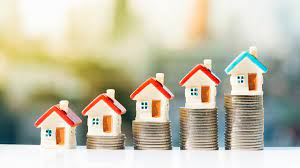

### import librarys

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

In [5]:
import warnings
warnings.filterwarnings('ignore')

### import datasets

In [6]:
data=pd.read_csv("train.csv")

In [7]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
#shape of the dataset
data.shape

(1460, 81)

In [10]:
#columns of the dataset
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
#checking for duplicated values
data.duplicated().sum()

0

In [12]:
#checking for null values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
#keeping the null values in the null_counts
null_counts=data.isnull().sum()

In [14]:
#assining the null value features to features_with_null
features_with_null=null_counts[null_counts >0].index
print(features_with_null)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [15]:
#counting the null values for the each feature
null_counts=data[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']].isnull().sum()

In [16]:
#printing the null_counts
print(null_counts)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### droping the null values

In [17]:
#droping the columns with more null values
data=data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

### filling the null values 

In [18]:
numeric_feature=['LotFrontage','MasVnrArea','GarageYrBlt']
for features in numeric_feature:
    data[features].fillna(data[features].mean(),inplace= True)
categorical_features=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']
for feature in categorical_features:
    data[feature].fillna(data[feature].mode(),inplace=True)

In [19]:
#checking for the null values
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
data=data.drop(['Id'],axis=1)

In [21]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [23]:
#assining the object datatypes to the object_columns
object_columns=data.select_dtypes(include='object').columns.tolist()

#assining the int float datatypes to the numerical_columns
numerical_columns=data.select_dtypes(include=['int','float']).columns.tolist()

print("Object columns: " , object_columns)
print('\n')
print("numerical_columns: ", numerical_columns)

Object columns:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


numerical_columns:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPo

In [26]:
#printing the number of uniquie values for the each feature
data.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 76, dtype: int64

In [27]:
#printing the each uniquie value for each feature of object_columns
for i in object_columns:
    print(i)
    print(data[i].unique())
    print('\n')

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']


Street
['Pave' 'Grvl']


LotShape
['Reg' 'IR1' 'IR2' 'IR3']


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']


Utilities
['AllPub' 'NoSeWa']


LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


LandSlope
['Gtl' 'Mod' 'Sev']


Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


Exterior1st
['VinylSd' 'MetalS

In [29]:
# printing the number of uniquie values for the each feature of the object_columns
for i in object_columns:
    print(i)
    print(data[i].value_counts())
    print('\n')

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill   

## Countplot for object_columns
for i in object_columns:
    print('Counrplot for :', i)
    plt.figure(figsize=(15,6))
    sns.countplot(x= data[i],data = data , palette= 'hls')
    plt.xticks(rotation = -45)
    plt.show()
    print("\n")

## pieplot for object_columns
for i in object_columns:
    print('Pieplot for :', i)
    plt.figure(figsize=(20,10))
    data[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title('Distribution of' +i)
    plt.ylabel('')
    plt.show()
    print('\n')
    
    

## barplot for object_columns by using go
for i in object_columns:
    fig=go.Figure(data=[go.Bar(x=data[i].value_counts().index,y=data[i].value_counts())])
    fig.update_layout(
        title = i ,
        xaxis_title=i,
        yaxis_title="Count")
    fig.show()

## pieplot for object_columns by using px
for i in object_columns:
    print('Pie plot for :' , i)
    fig=px.pie(data,names=i,title='Distribution of ' +i)
    fig.show()
    print('\n')

## histogram for numerical_columns
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(data[i], kde=True, bins =20, palette='hls')
    plt.xticks(rotation=0)
    plt.show()

## distplot for numerical_columns
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(data[i], kde=True, bins =20)
    plt.xticks(rotation=0)
    plt.show()

## boxplot for numerical_columns
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data[i],data=data,palette='hls')
    plt.xticks(rotation=0)
    plt.show()

## violin plot for numerical_columns
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(data[i],data=data,palette='hls')
    plt.xticks(rotation=0)
    plt.show()

## histgram for numerical_columns by using go
for i in numerical_columns:
    fig=go.Figure(data=[go.Histogram(x=data[i],nbinsx=20)])
    fig.update_layout(
      title=i,
      xaxis_title=i,
      yaxis_title="Count")
    fig.show()
    

## box plot for numerical_column by using go
for i in numerical_columns:
    fig=go.Figure(data=[go.Box(x=data[i])])
    fig.update_layout(
      title=i,
      xaxis_title=i,
      yaxis_title="Count")
    fig.show()

## violin plot for numerical_columnby using go
for i in numerical_columns:
    fig=go.Figure(data=[go.Violin(x=data[i])])
    fig.update_layout(
      title=i,
      xaxis_title=i,
      yaxis_title="Count")
    fig.show()

## barplot for the numerical_columns
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.barplot(x=data[j],y=data[i],data=data,ci=None , palette='hls')          
        plt.show()

## boxplot for the bivariant numerical-object
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.boxplot(x=data[j],y=data[i],data=data,palette='hls')          
        plt.show()

## violinplot for the bivariant numerical-object
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.violinplot(x=data[j],y=data[i],data=data,palette='hls')          
        plt.show()

## lineplot for the  numerical_columns
for i in numerical_columns:
        plt.figure(figsize=(8,4))
        sns.lineplot(x=data[j],y=data['SalePrice'],data=data,palette='hls')          
        plt.show() 

## lineplot for bivariant numerical-numerical
for i in numerical_columns:
    for j in numerical_columns:
        if i !=j:
            plt.figure(figsize=(15,6))
            sns.lineplot(x=data[j],y=data[i],data=data,ci=None,palette='hls')
            plt.show()

## scatter plot for bivariant numerical-numerical
for i in numerical_columns:
    for j in numerical_columns:
        if i!= j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x=data[j],y=data[j],data=data,palette='hls')
            plt.show()

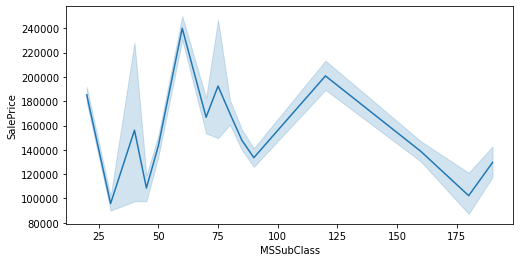

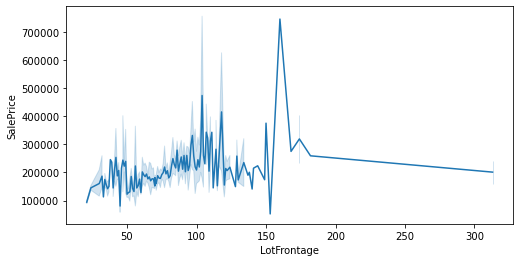

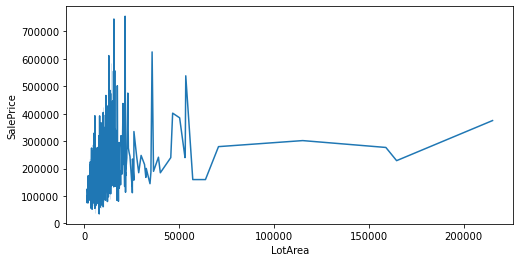

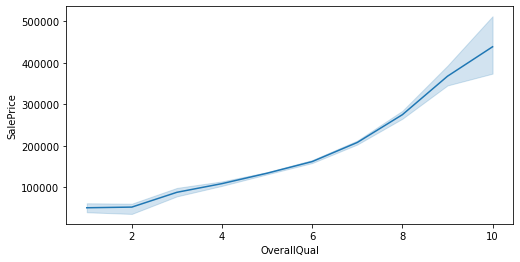

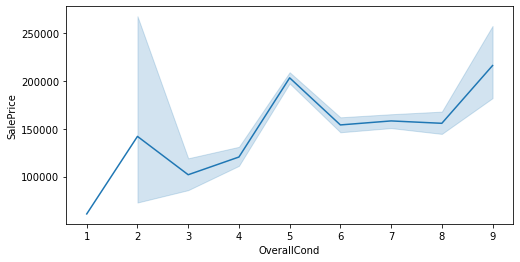

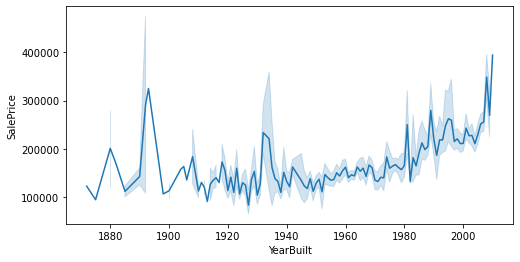

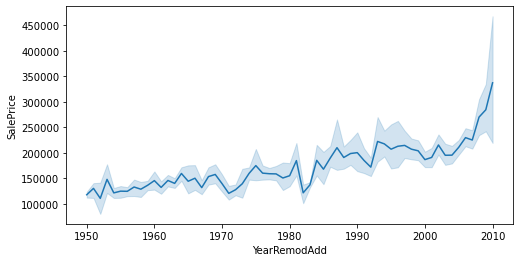

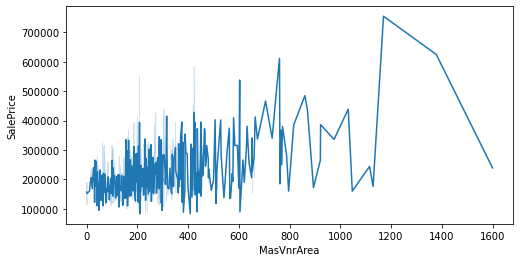

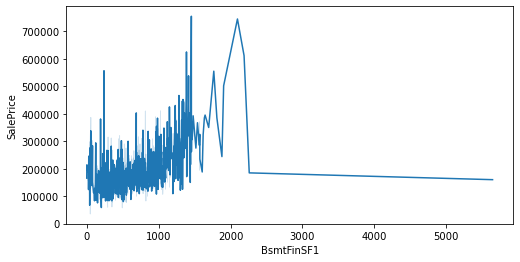

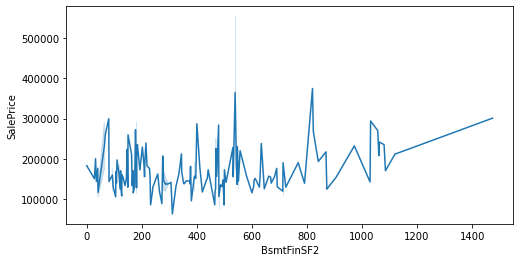

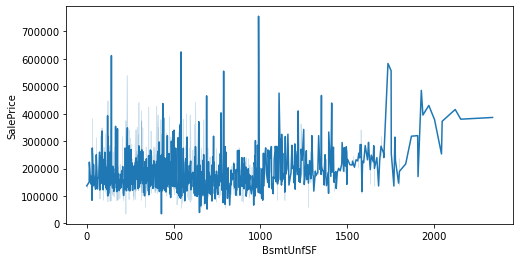

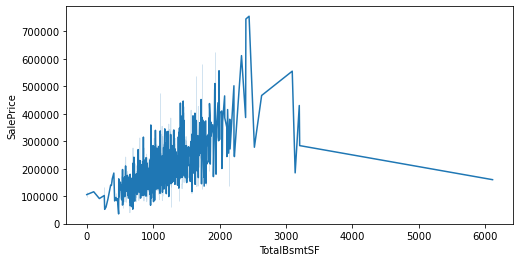

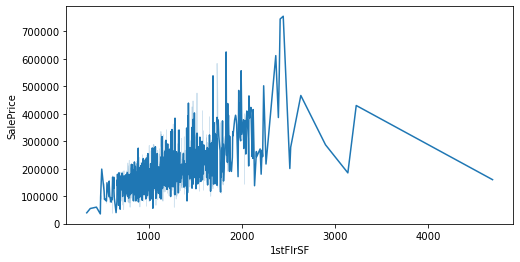

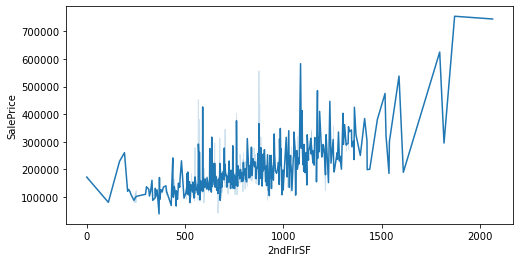

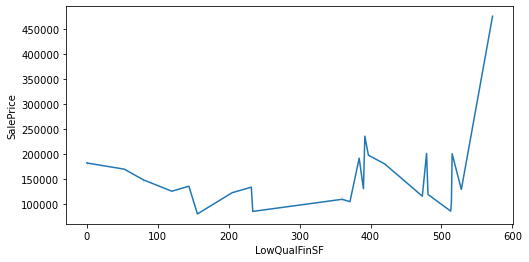

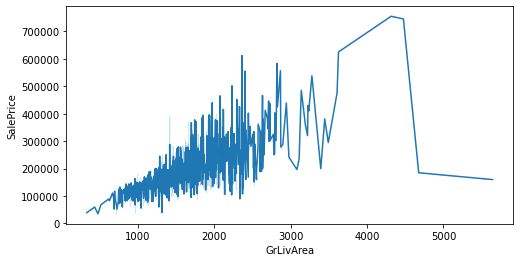

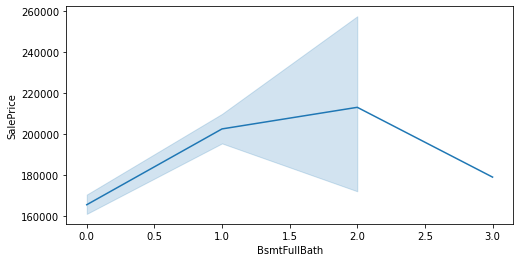

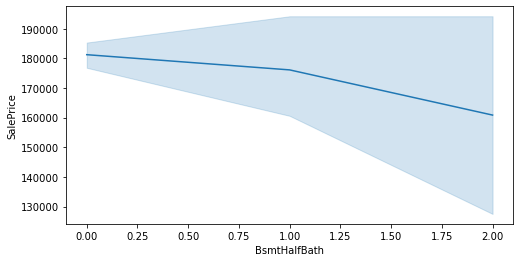

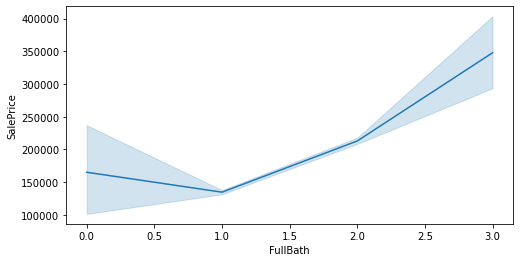

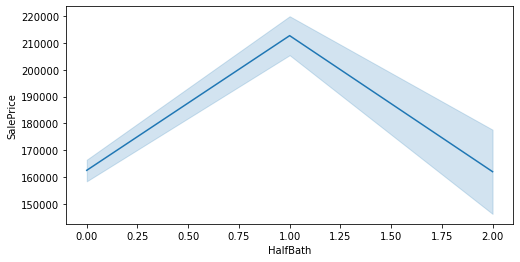

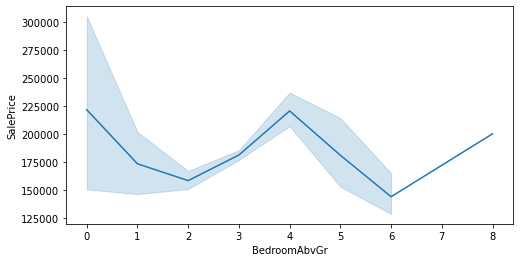

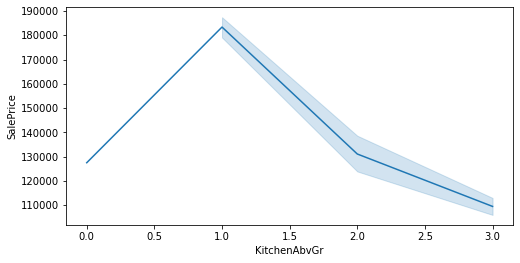

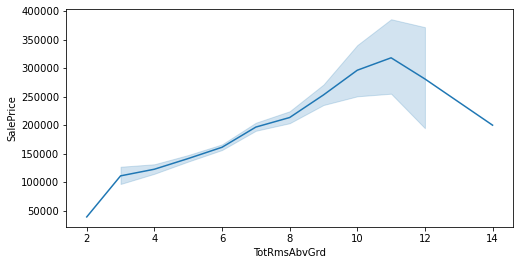

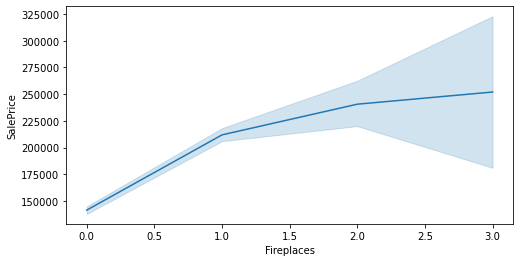

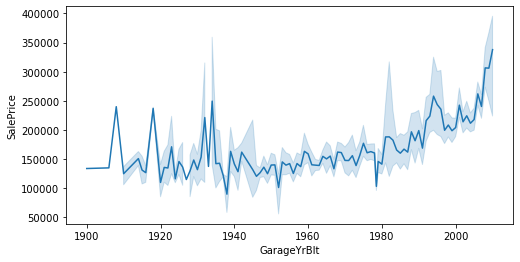

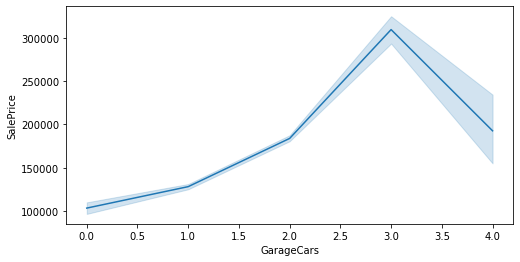

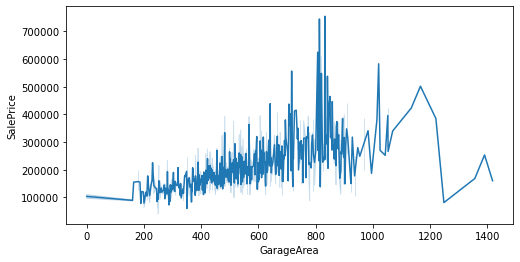

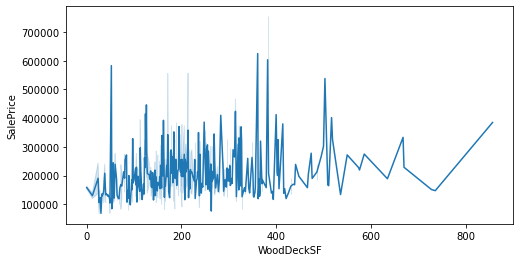

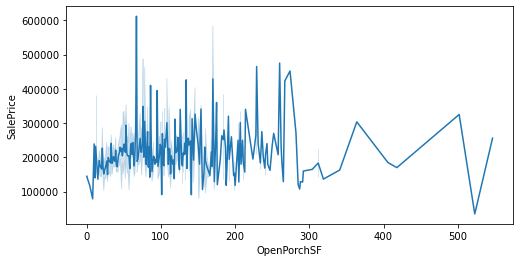

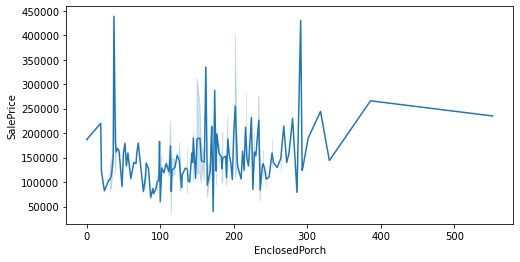

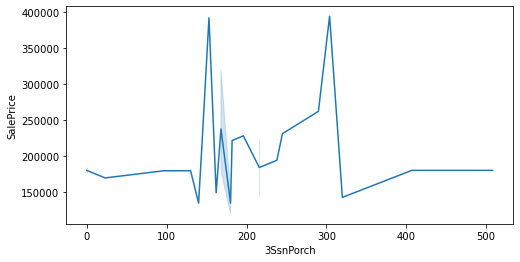

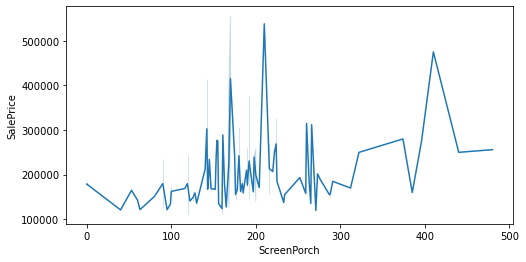

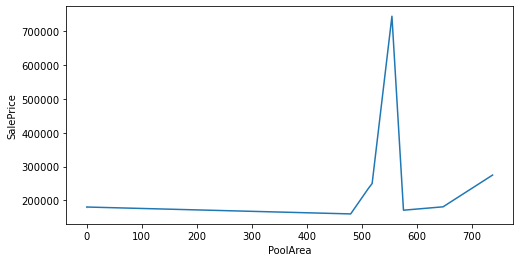

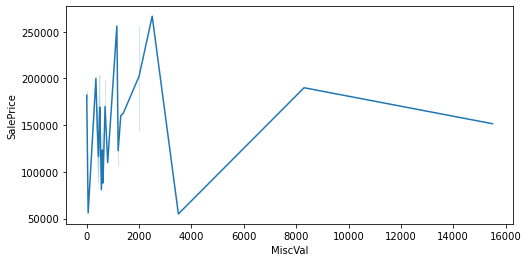

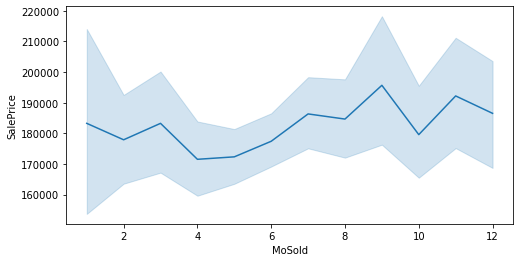

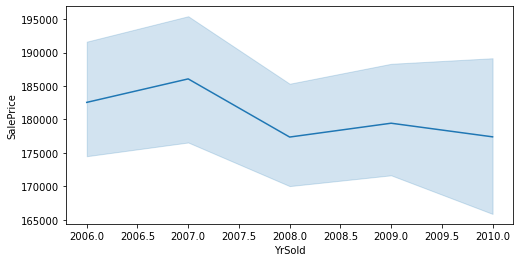

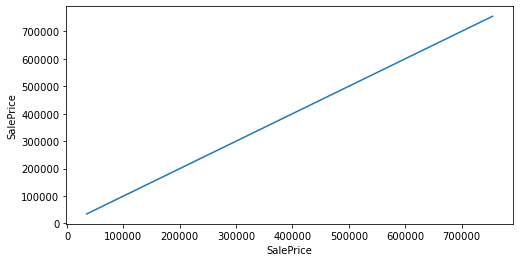

In [31]:
##lineplot for each numerical_column with the SalePrice
for i in numerical_columns:
        plt.figure(figsize=(8,4))
        sns.lineplot(x=data[i],y=data['SalePrice'],data=data,palette='hls')          
        plt.show() 

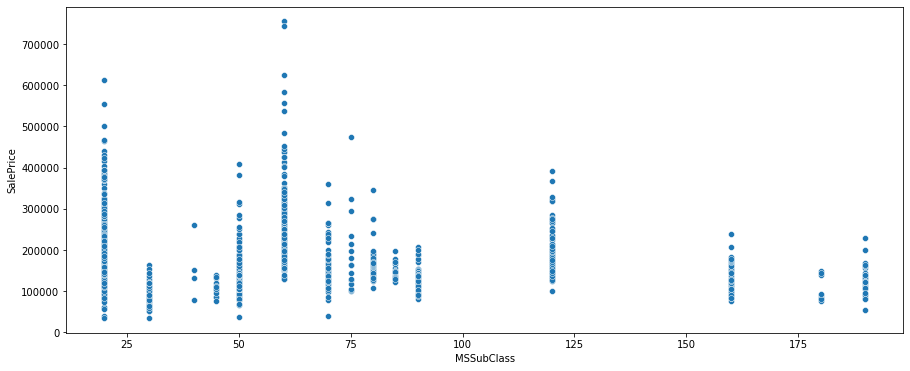

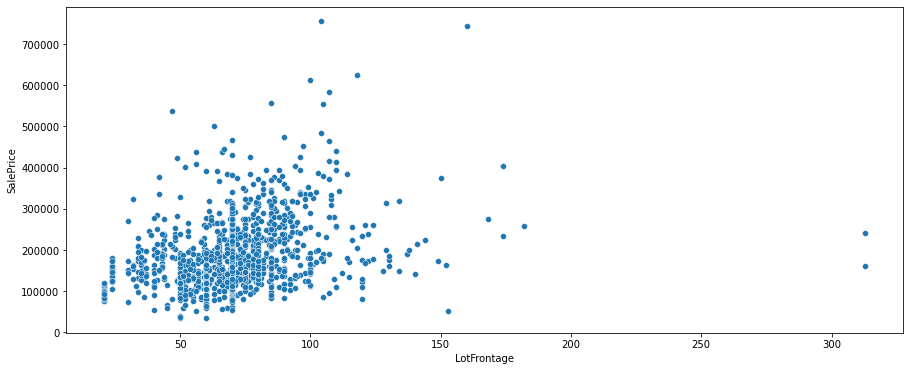

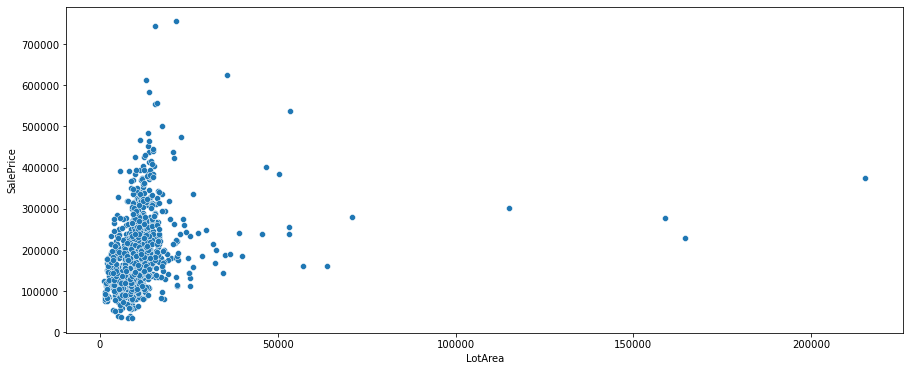

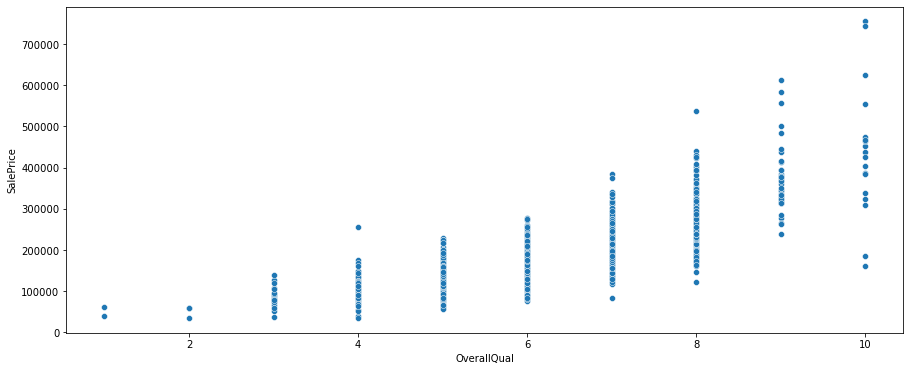

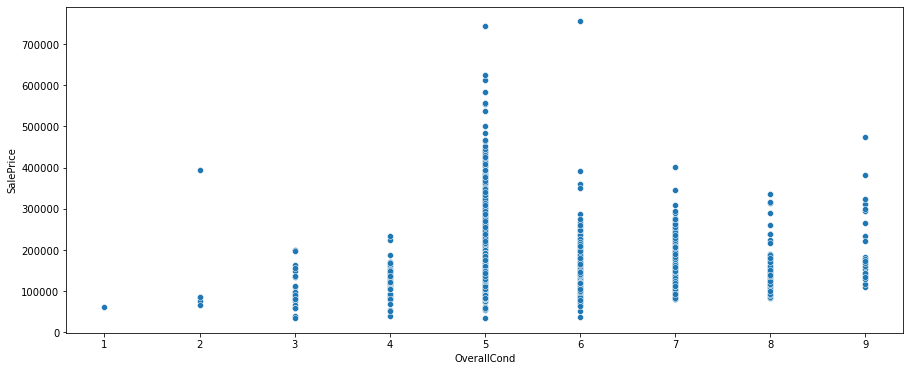

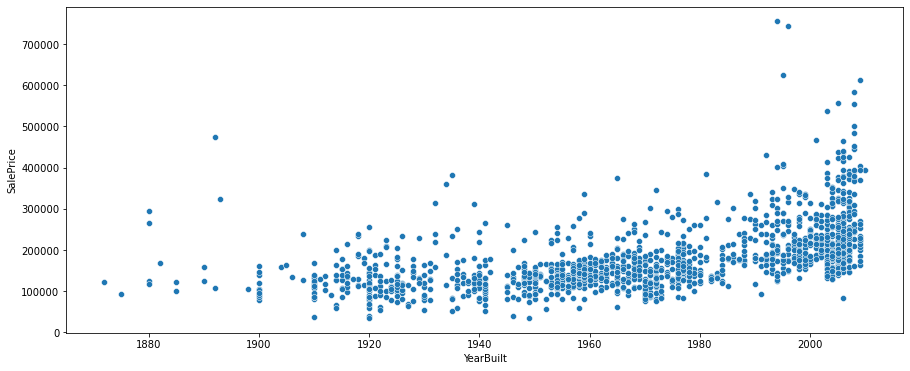

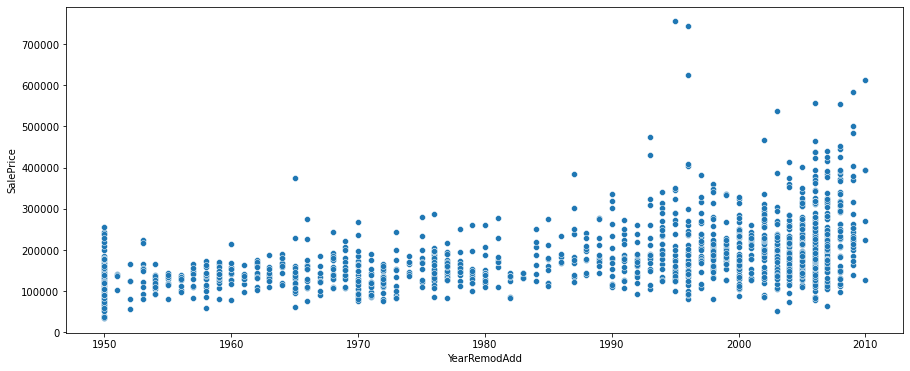

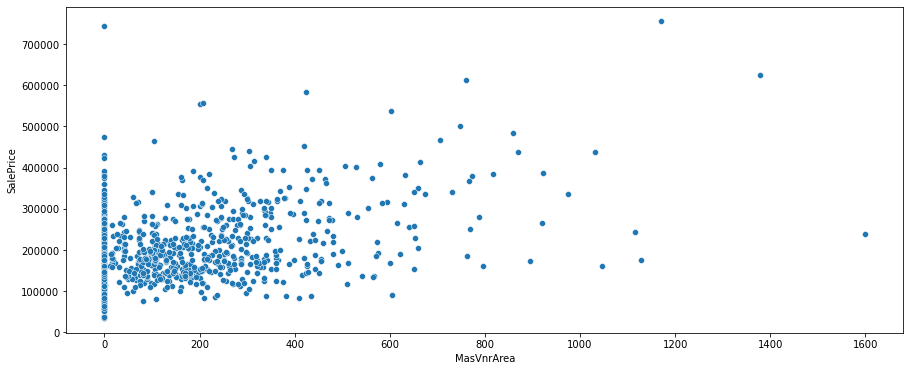

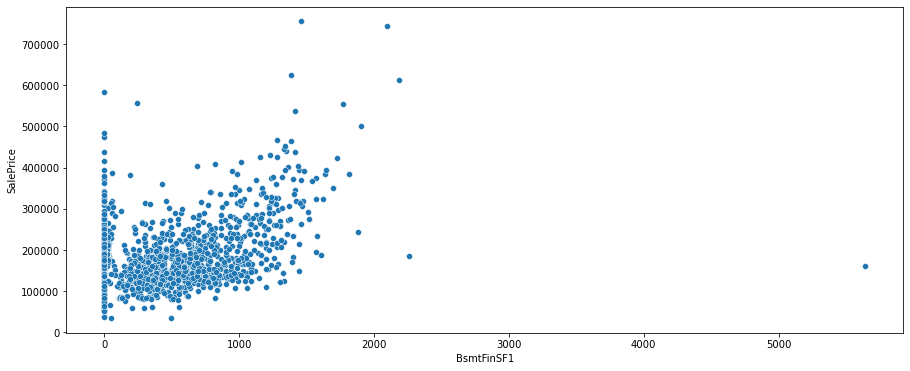

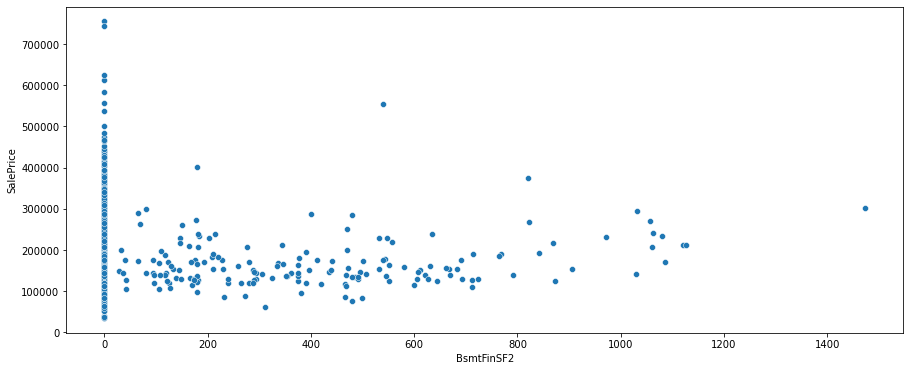

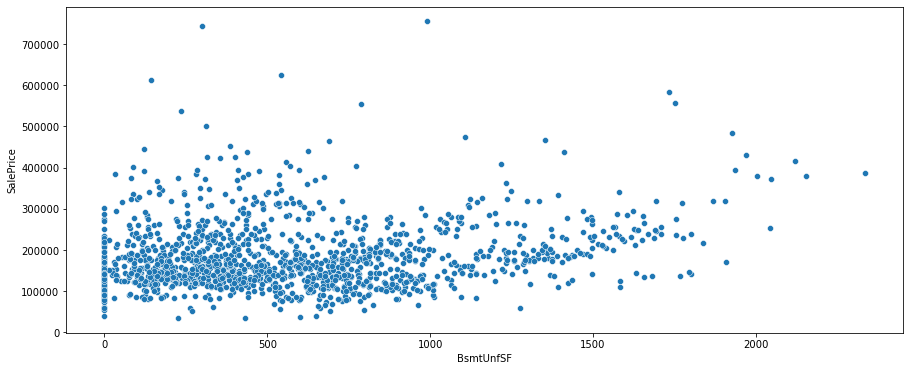

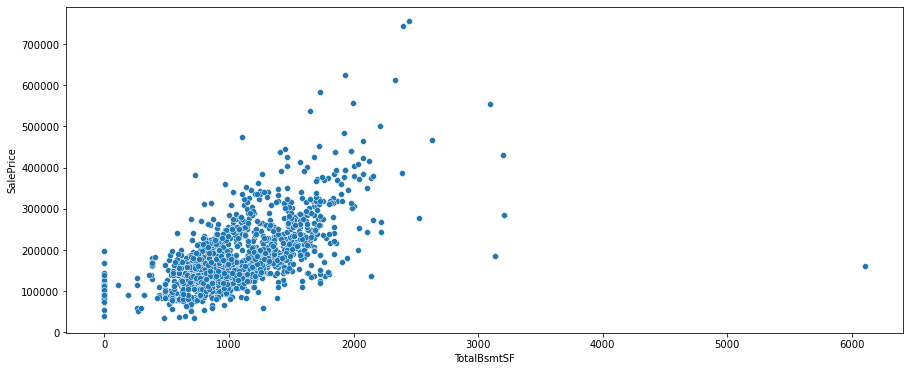

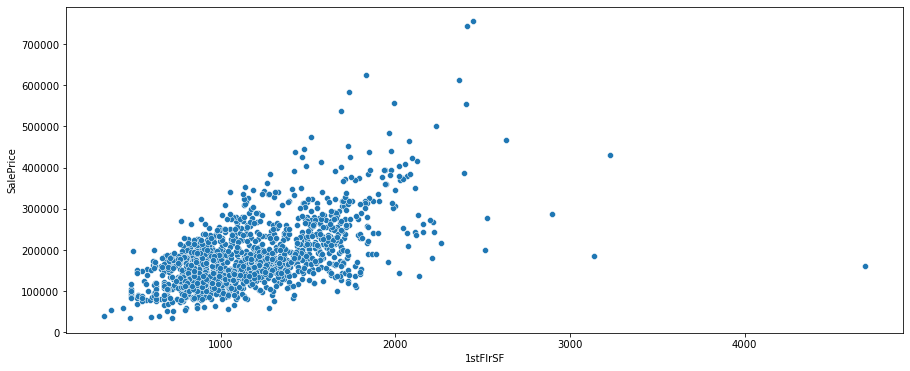

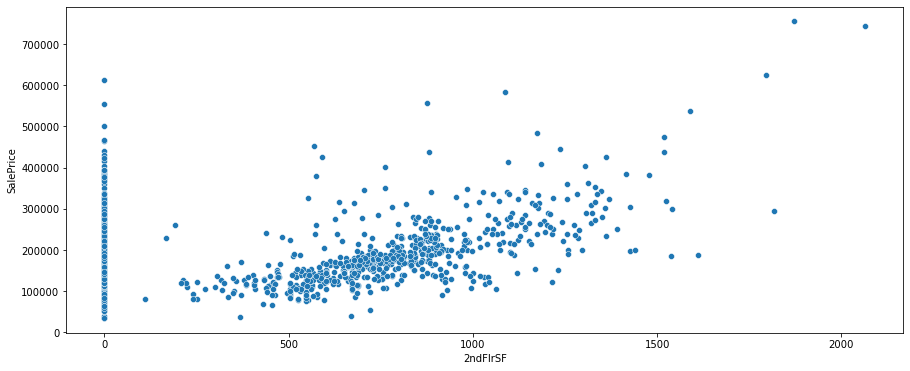

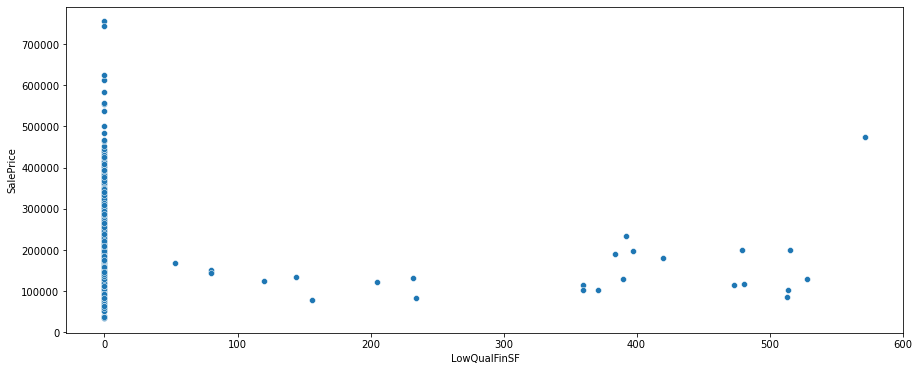

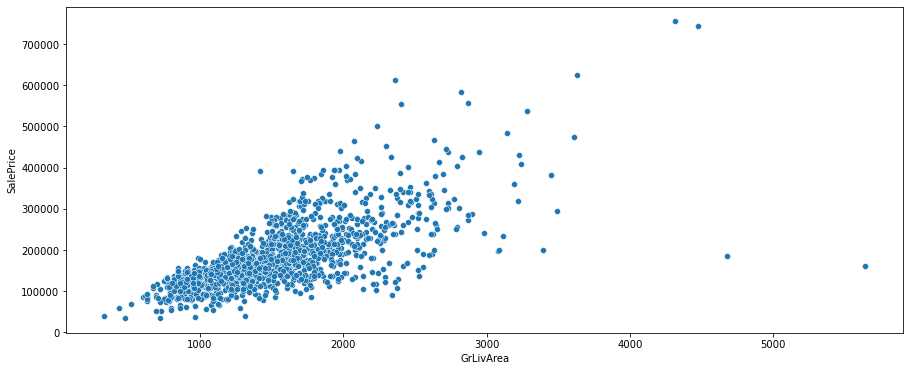

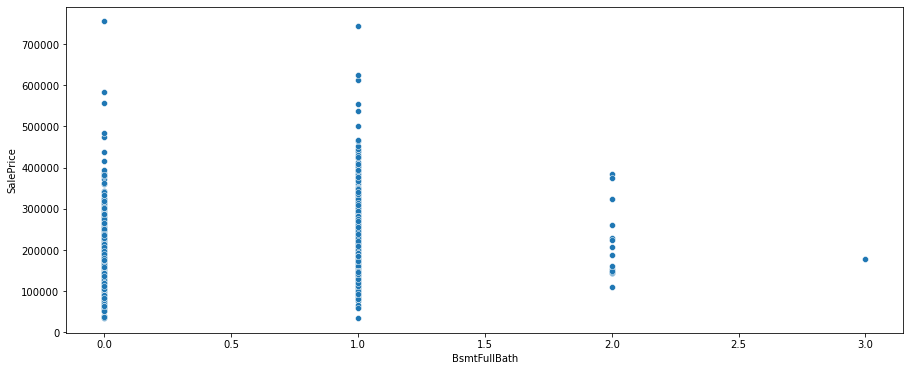

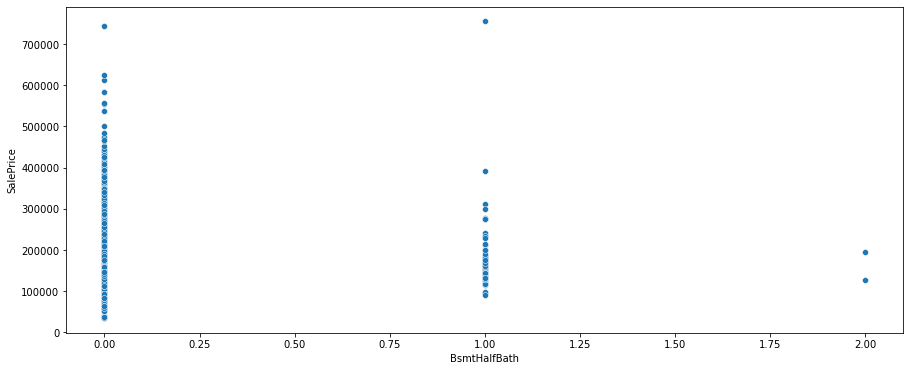

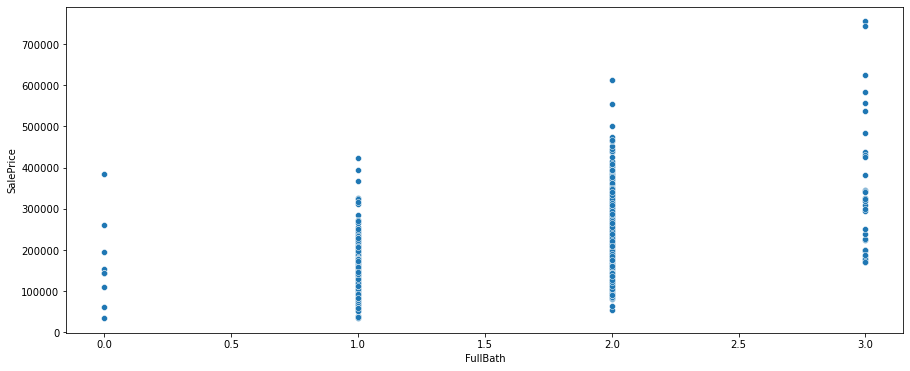

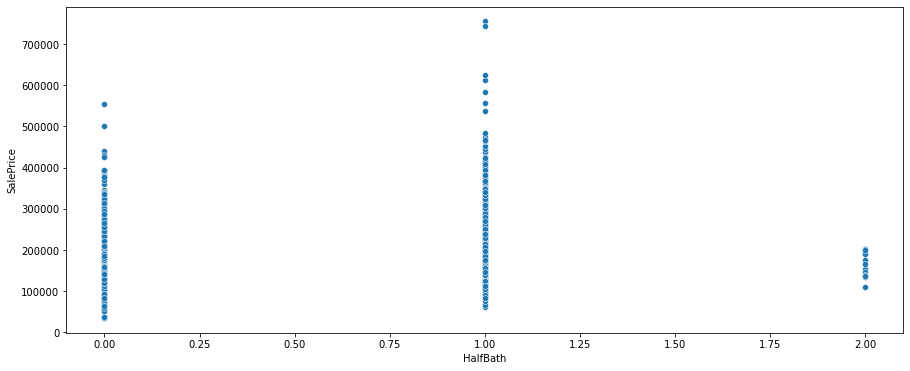

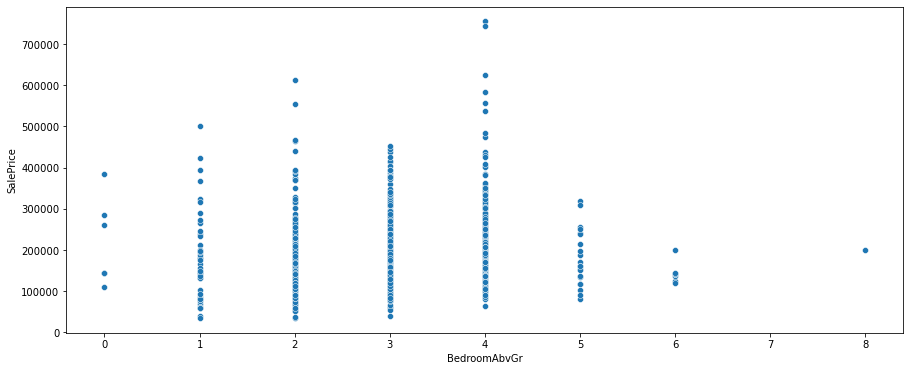

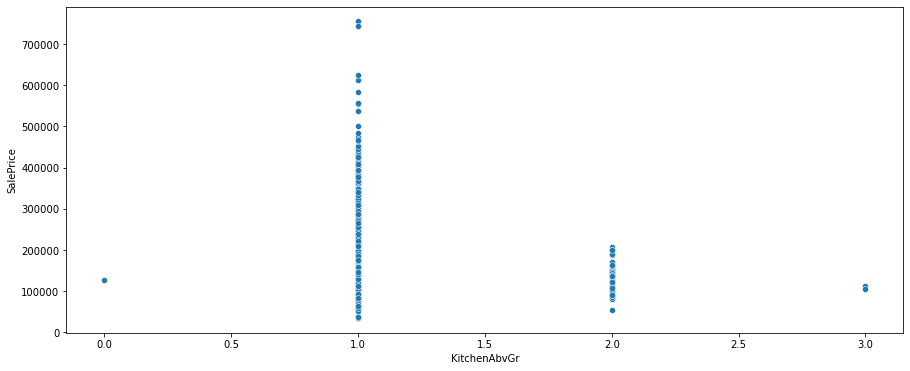

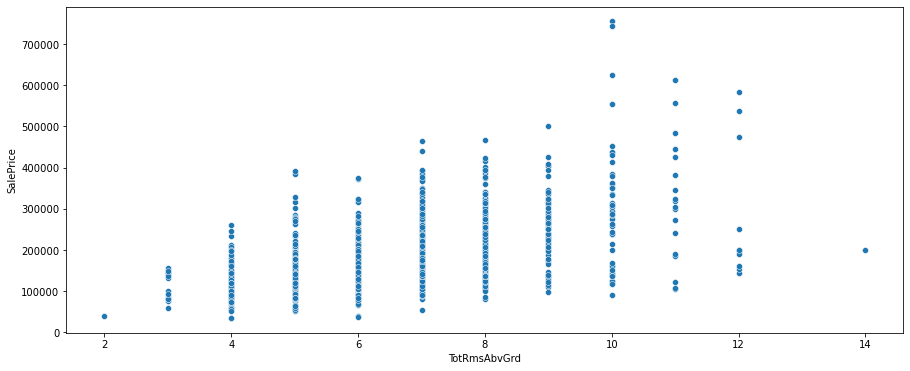

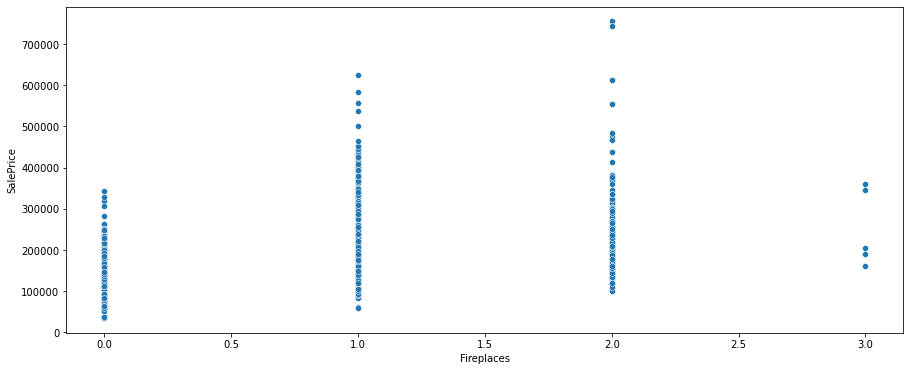

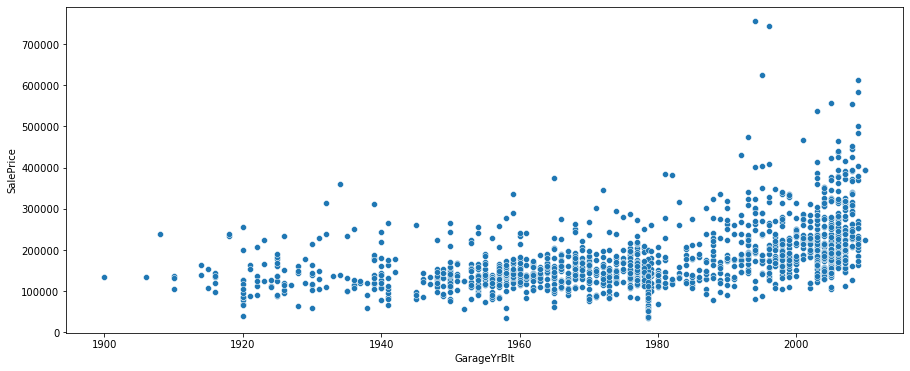

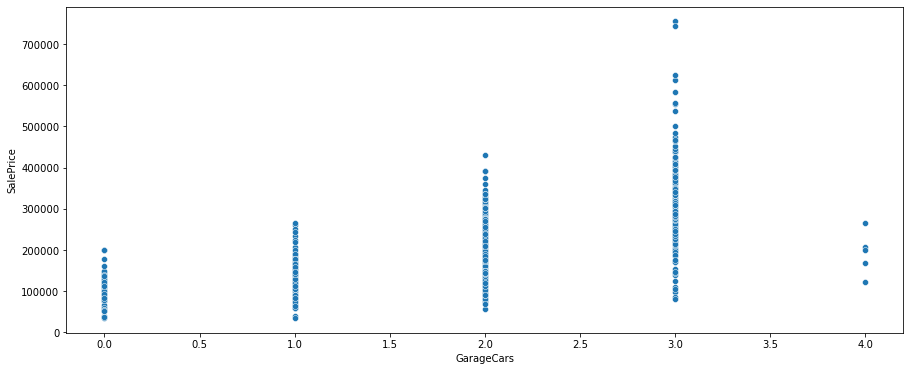

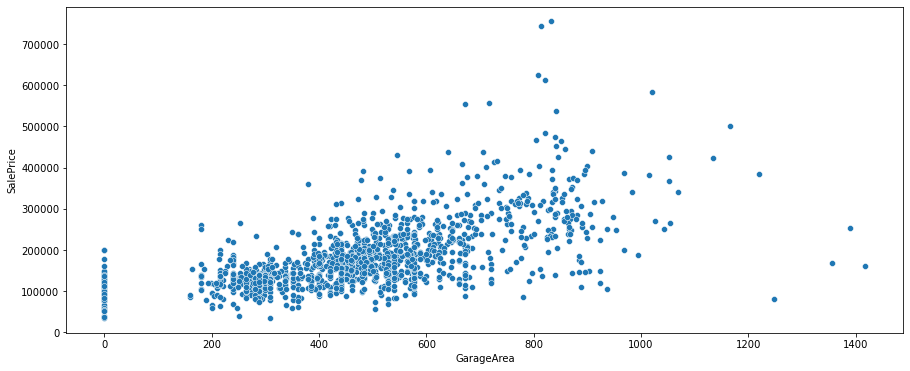

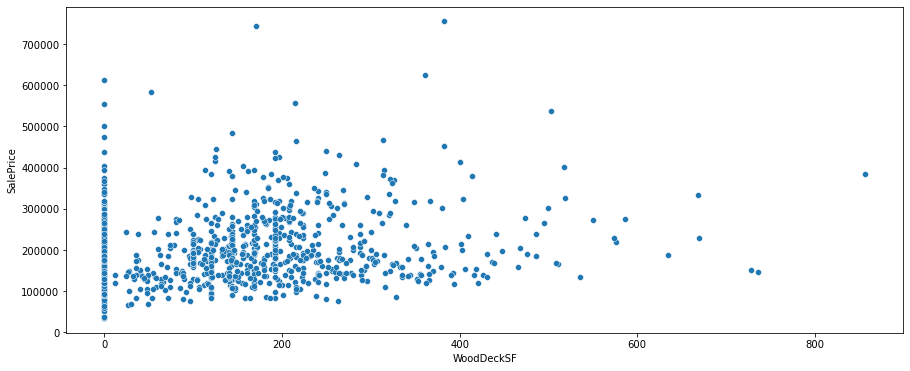

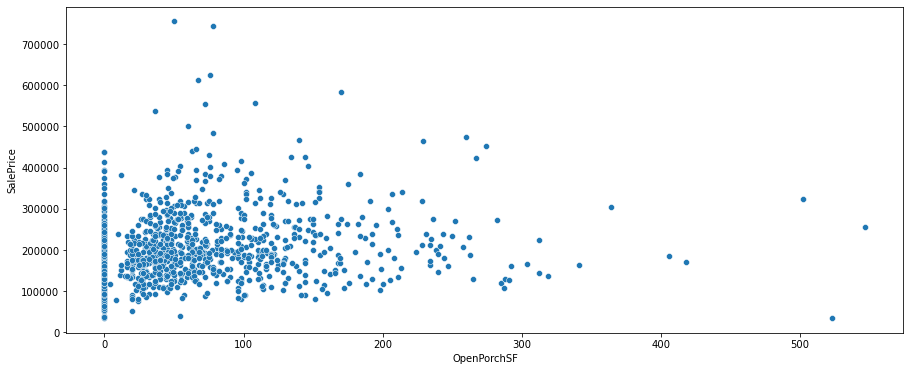

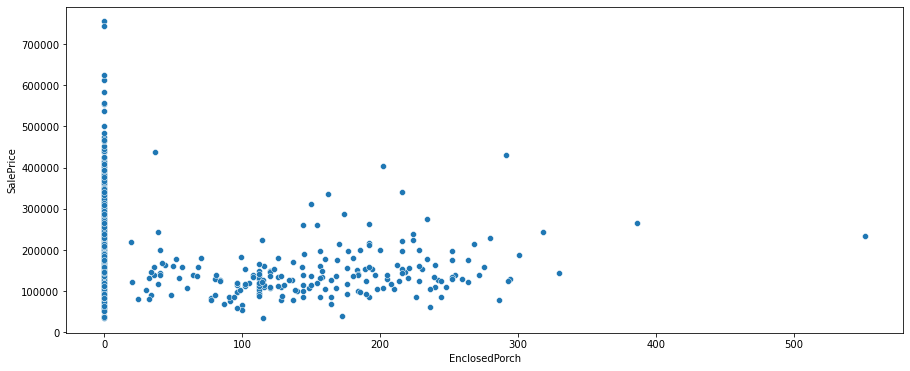

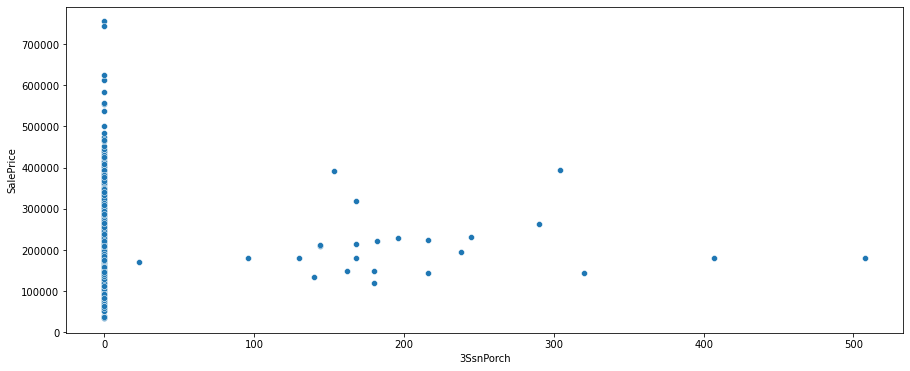

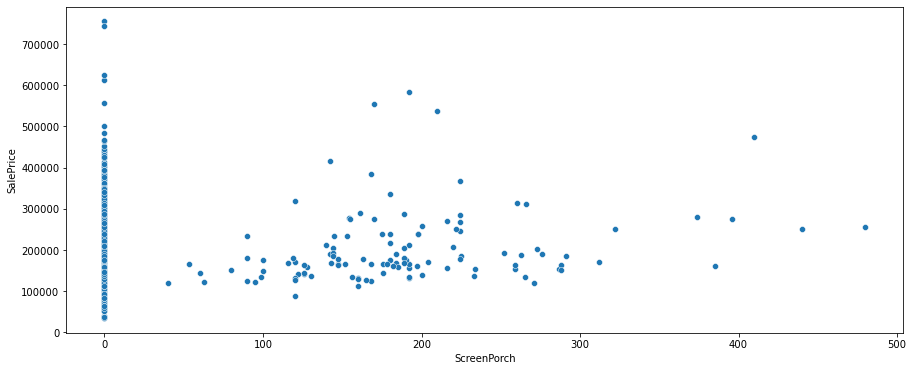

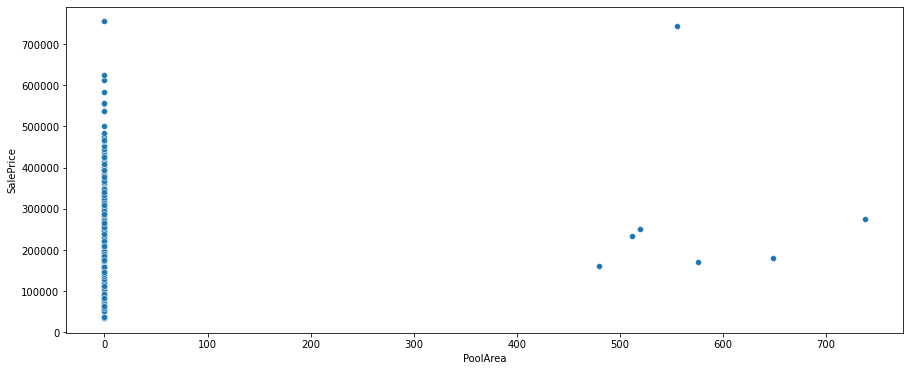

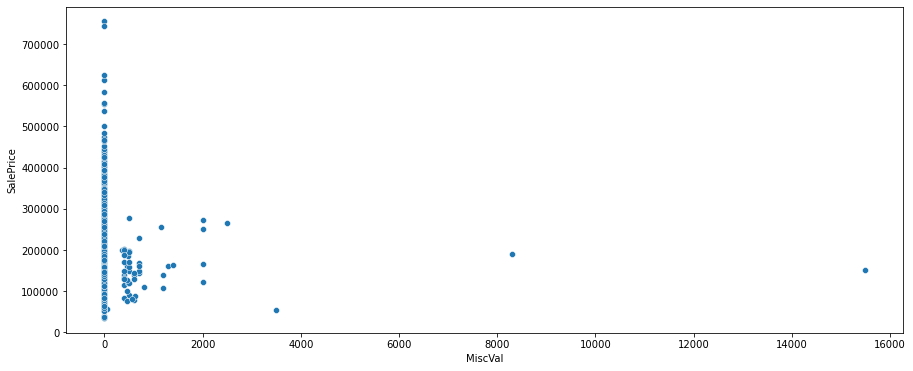

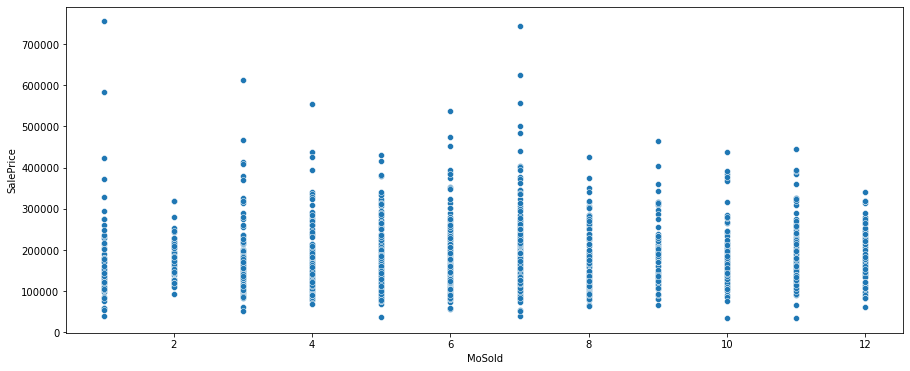

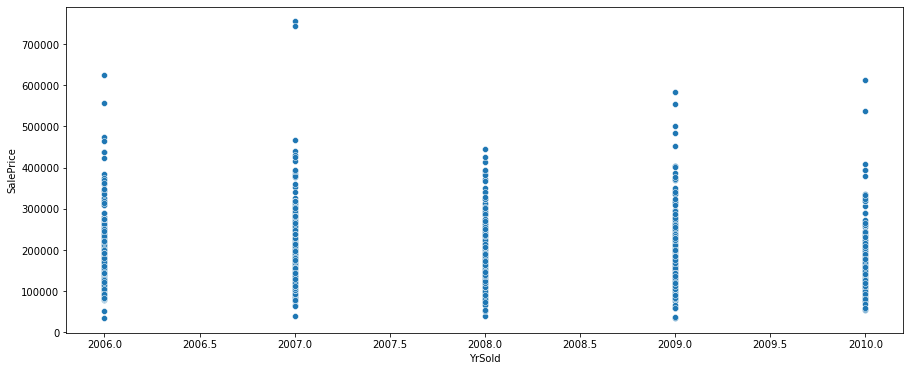

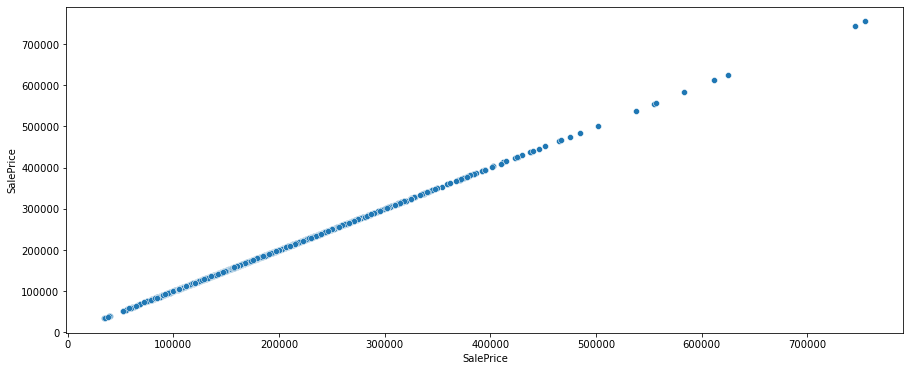

In [32]:
#scatterplot for each numerical_column with the saleprice
for i in numerical_columns:
    
        plt.figure(figsize=(15,6))
        sns.scatterplot(x=data[i],y=data['SalePrice'],data=data,palette='hls')
        plt.show()
        

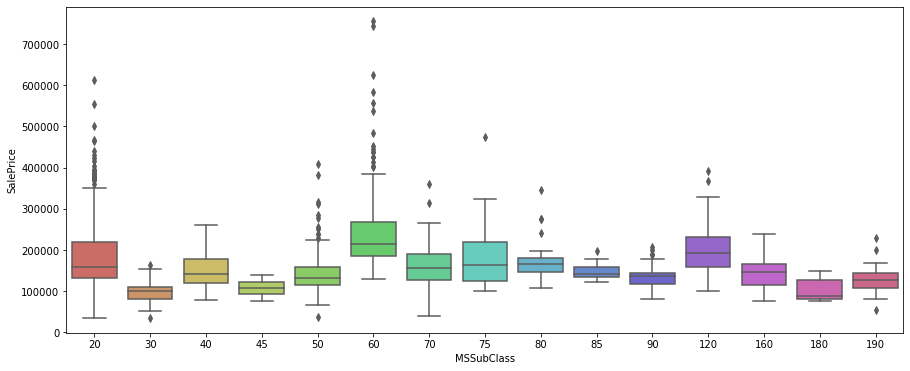

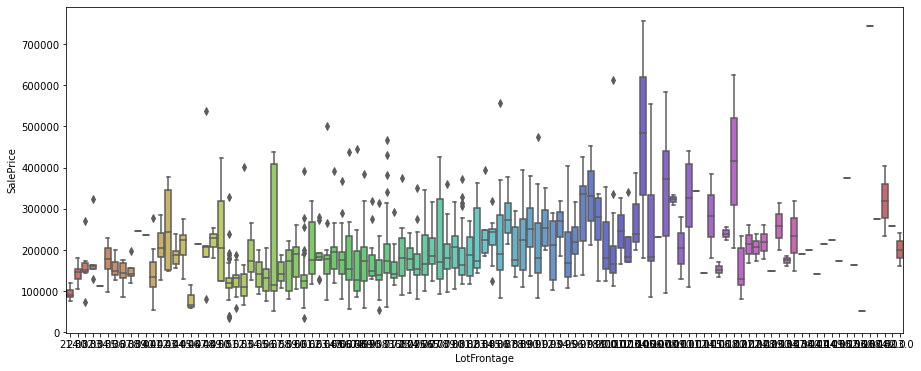

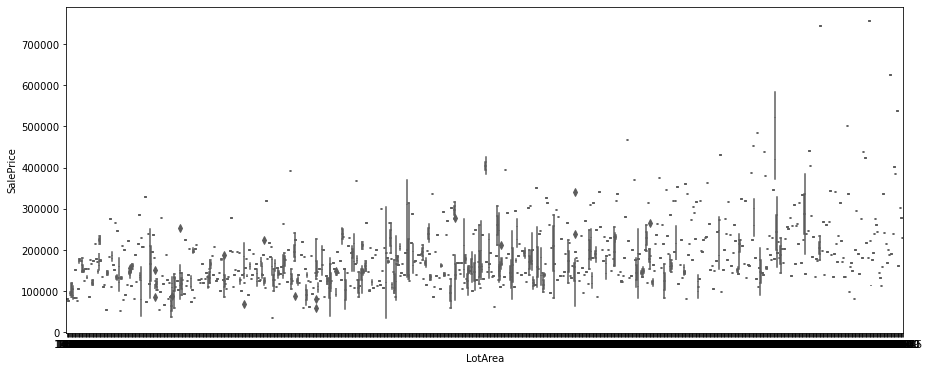

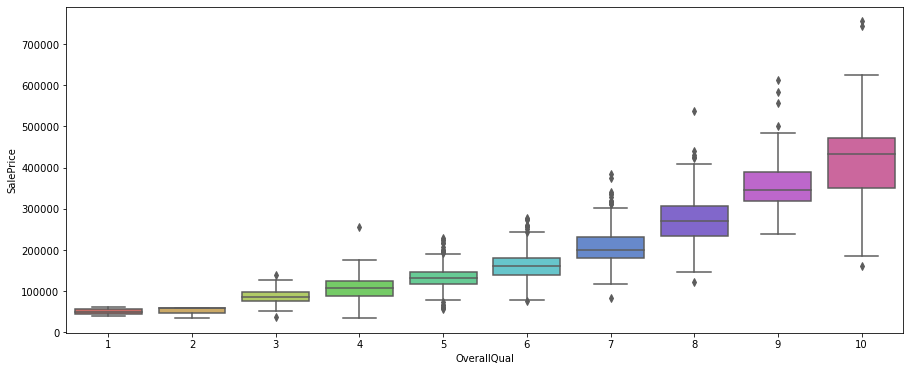

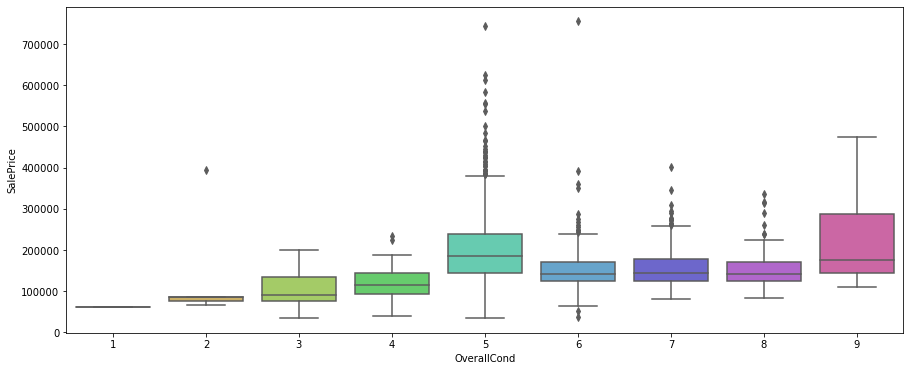

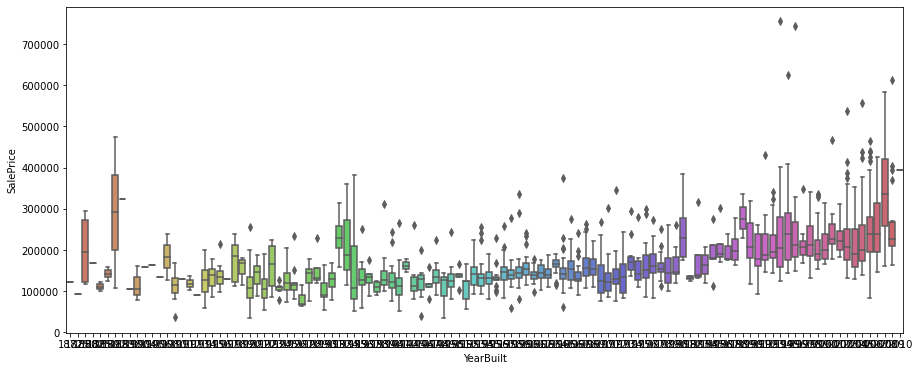

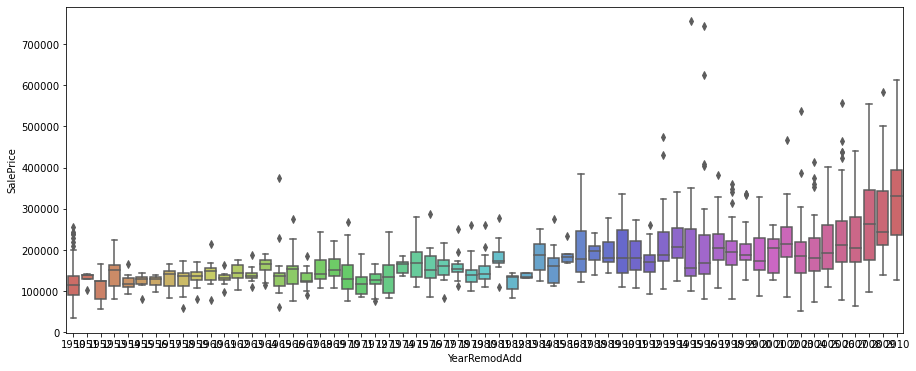

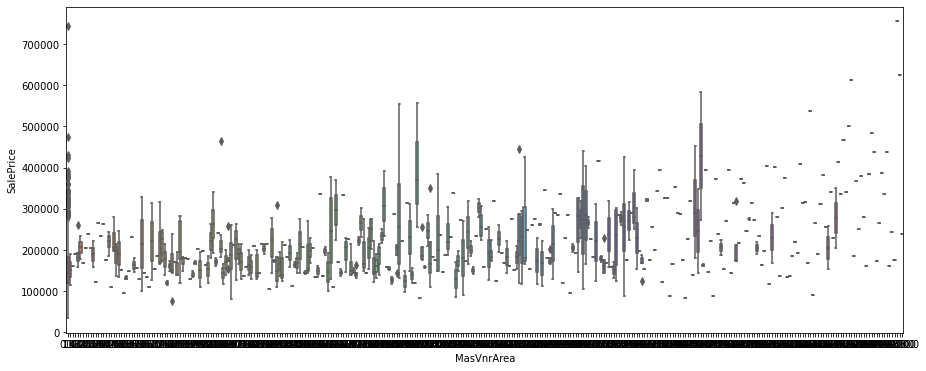

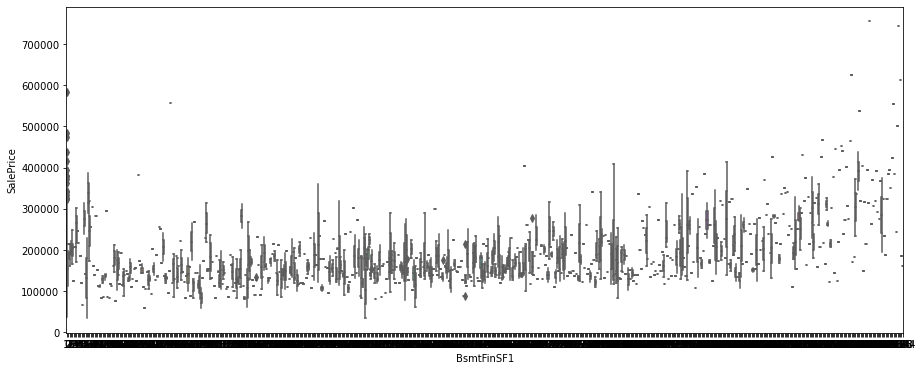

In [ ]:
#boxplot for each numerical_column with the SalePrice
for i in numerical_columns:
    
        plt.figure(figsize=(15,6))
        sns.boxplot(x=data[i],y=data['SalePrice'],data=data,palette='hls')
        plt.show()
        

## Correlation

In [ ]:
corr=data.corr()
corr

## HeatMap for correlation

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("correlation plot")
plt.show()

In [66]:
df=data.copy()

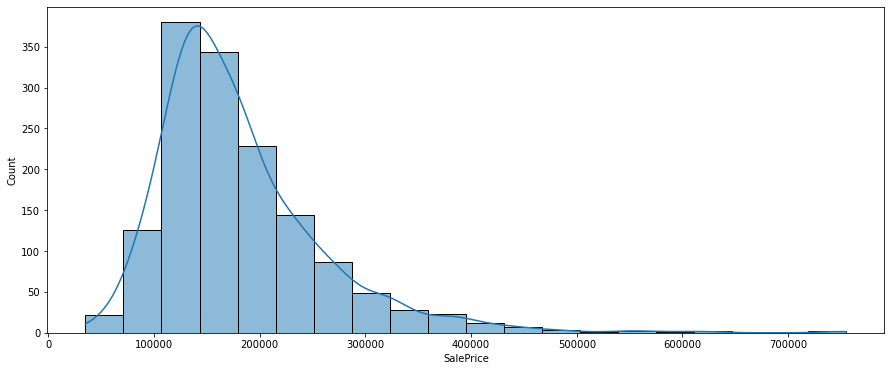

In [32]:
plt.figure(figsize=(15,6))
sns.histplot(df['SalePrice'],kde=True,bins=20,palette='hls')
plt.xticks(rotation=0)
plt.show()

In [33]:
df['SalePrice']=np.log(df['SalePrice'])

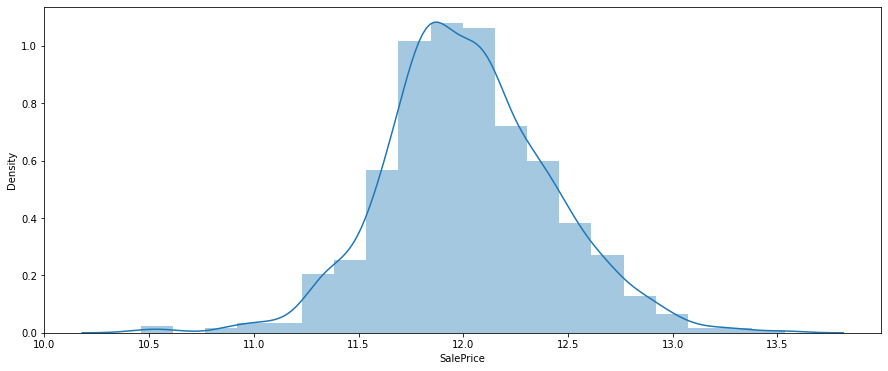

In [34]:
plt.figure(figsize=(15,6))
sns.distplot(df['SalePrice'],kde=True,bins=20)
plt.xticks(rotation=0)
plt.show()

In [35]:
df['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [36]:
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [37]:
numerical_columns=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt',
'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold',]

In [38]:
skewness = df[numerical_columns].skew()
skewed_columns=skewness[(skewness >1)|(skewness < -1)]
print(skewed_columns)

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
TotalBsmtSF       1.524255
1stFlrSF          1.376757
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
dtype: float64


In [39]:
skew_features=skewed_columns.index.tolist()

In [40]:
for feature in skew_features:
    df[feature]=np.log1p(df[feature])

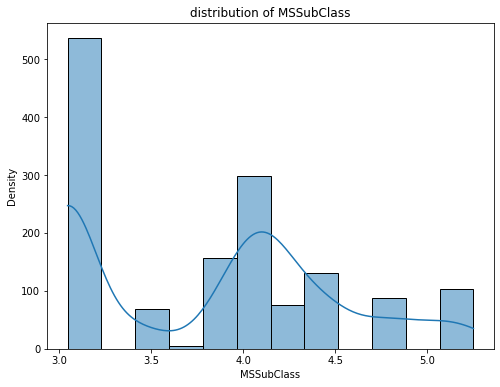

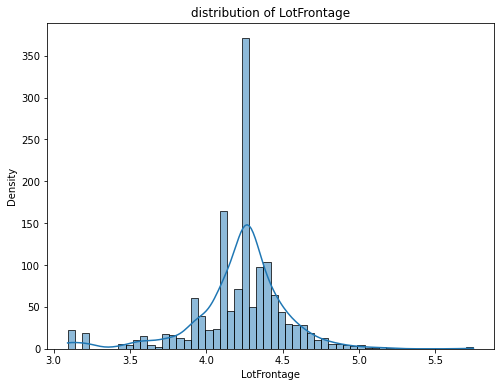

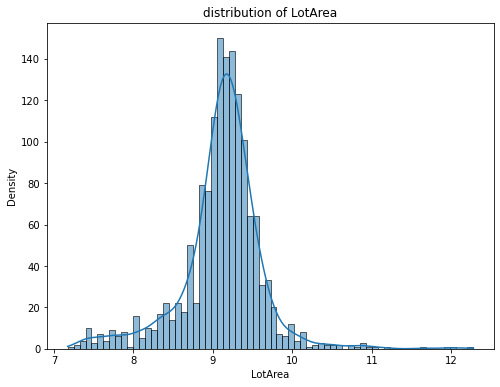

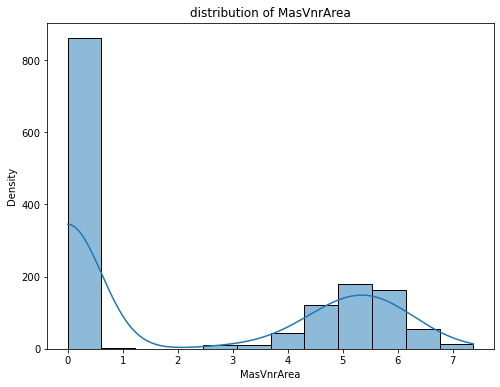

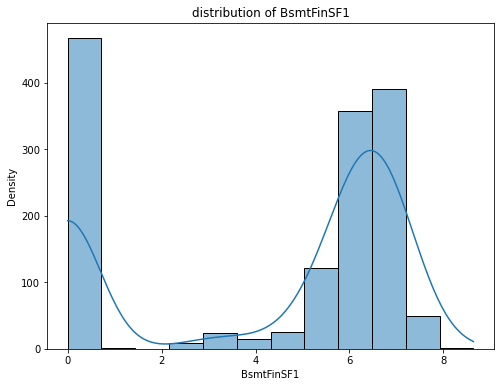

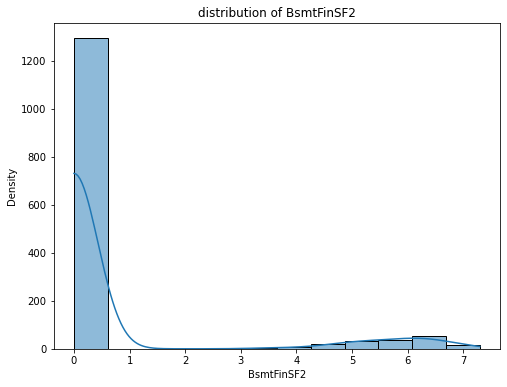

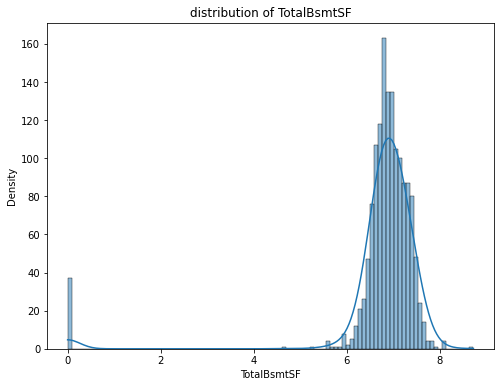

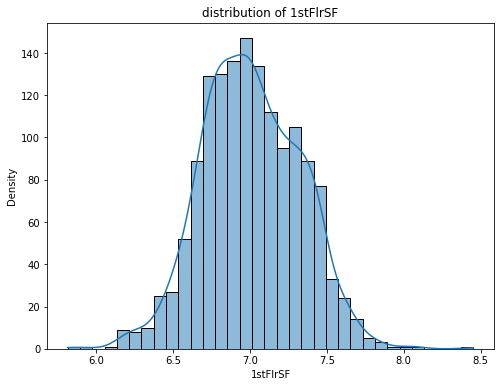

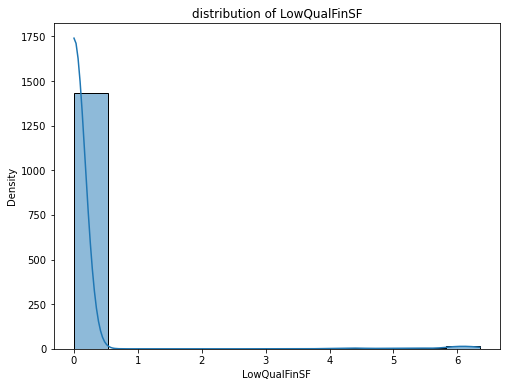

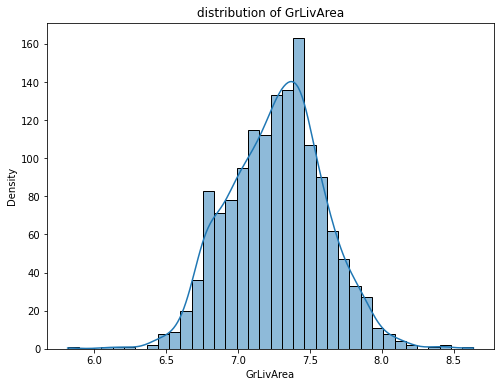

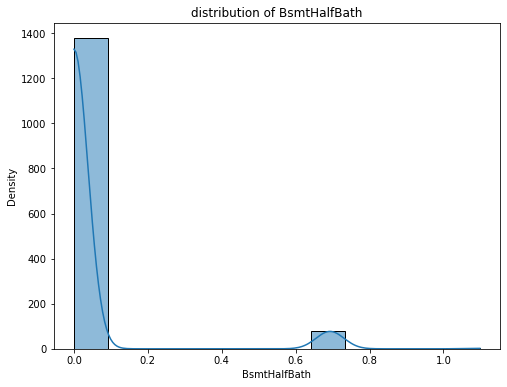

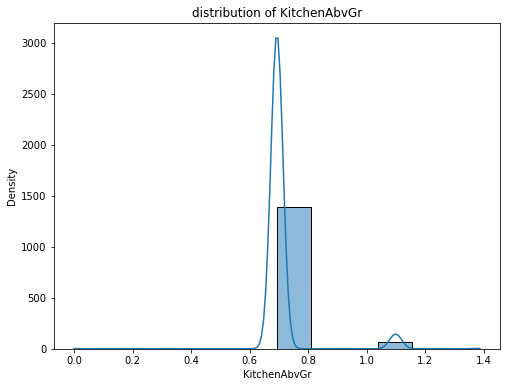

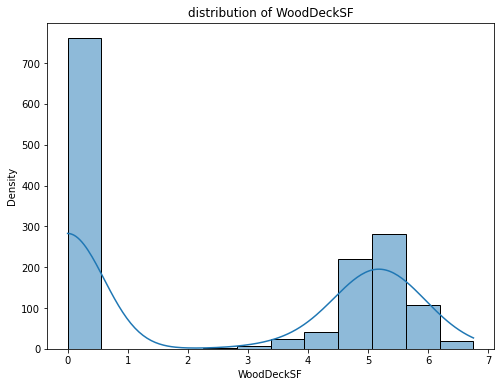

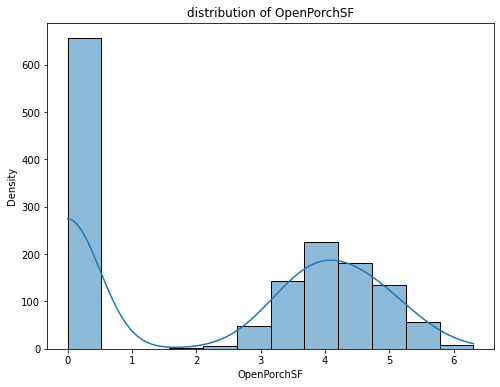

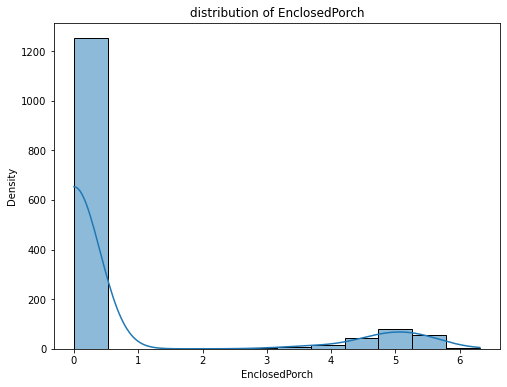

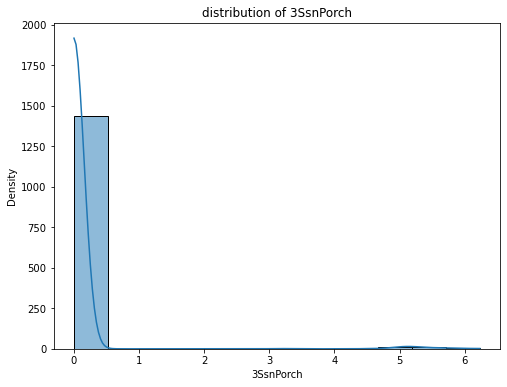

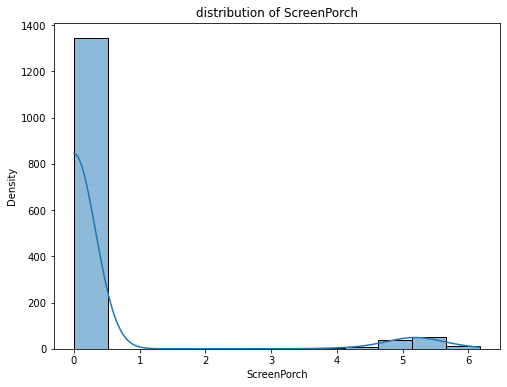

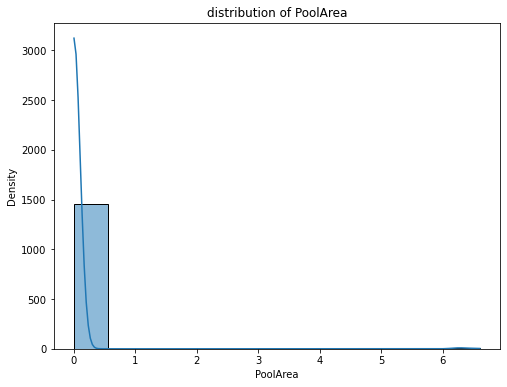

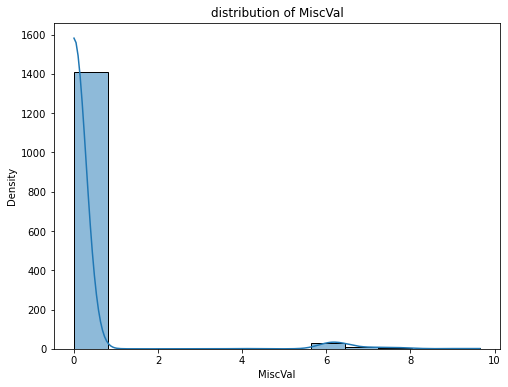

In [41]:
for feature in skew_features:
    plt.figure(figsize=(8,6))
    sns.histplot(df[feature],kde=True)
    plt.title(f'distribution of {feature}' )
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

In [42]:
df=pd.get_dummies(df,columns=object_columns, drop_first= True)

In [43]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,0,1,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,0,1,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,0,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0,0,0,0,1,0,0,0,1,0
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0,0,0,0,1,0,0,0,1,0
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0,0,0,0,1,0,0,0,1,0


In [44]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [45]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [47]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = regression_model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2_linear=r2_score(y_test,y_pred)
print("mean squared error (MSE):", mse)
print("root mean squared error (RMSE):" ,rmse)
print("R-squared error",r2_linear)

mean squared error (MSE): 0.027459997016618384
root mean squared error (RMSE): 0.16571058209003547
R-squared error 0.852850976314905


In [50]:
corr1=df.corr()

In [51]:
corr1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.391599,-0.378062,0.078346,-0.039820,-0.002896,0.039769,0.012175,-0.092035,-0.085838,...,0.010478,0.025715,-0.059117,-0.018826,0.047682,0.030662,0.043334,0.004400,0.033320,-0.066732
LotFrontage,-0.391599,1.000000,0.654004,0.204399,-0.031393,0.088381,0.058630,0.118959,0.069293,0.036575,...,0.018921,-0.055678,0.109670,-0.021851,-0.075491,-0.037766,-0.006839,0.007142,-0.053121,0.108490
LotArea,-0.378062,0.654004,1.000000,0.178220,-0.006308,0.021943,0.027672,0.071824,0.096966,0.084312,...,0.016934,-0.018765,0.058055,0.001182,-0.036542,-0.013797,0.016973,-0.004322,-0.018264,0.061604
OverallQual,0.078346,0.204399,0.178220,1.000000,-0.091932,0.572323,0.550684,0.417093,0.054199,-0.101469,...,0.004269,-0.021172,0.327412,-0.057962,-0.225013,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.039820,-0.031393,-0.006308,-0.091932,1.000000,-0.375983,0.073741,-0.160299,0.045200,0.077992,...,0.001299,-0.019779,-0.156175,-0.050663,0.163684,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.030662,-0.037766,-0.013797,-0.041677,-0.038888,-0.045601,-0.040294,-0.015235,-0.018928,-0.018625,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,0.043334,-0.006839,0.016973,-0.044950,-0.033444,-0.010104,-0.020727,-0.011818,-0.010424,-0.032348,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004400,0.007142,-0.004322,-0.025515,-0.023873,-0.035785,-0.048056,0.005323,-0.035899,-0.005347,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.033320,-0.053121,-0.018264,-0.143282,0.161642,-0.158427,-0.120577,-0.093099,0.097823,0.059742,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [52]:
correlation_threshold=0.5

In [53]:
good_features=corr1[corr1['SalePrice'].abs()>correlation_threshold]['SalePrice'].index.tolist()

In [54]:
good_features.append('SalePrice')

In [55]:
good_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_PConc',
 'KitchenQual_TA',
 'SalePrice']

In [56]:
df3=df[good_features]

In [57]:
df3

,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice,ExterQual_Gd,ExterQual_TA,Foundation_PConc,KitchenQual_TA,SalePrice
0,7,2003,2003,6.753438,7.444833,2,8,2003.0,2,548,12.247694,1,0,1,0,12.247694
1,6,1976,1976,7.141245,7.141245,2,6,1976.0,2,460,12.109011,0,1,0,1,12.109011
2,7,2001,2002,6.825460,7.488294,2,6,2001.0,2,608,12.317167,1,0,1,0,12.317167
3,7,1915,1970,6.869014,7.448916,1,7,1998.0,3,642,11.849398,0,1,0,0,11.849398
4,8,2000,2000,7.044033,7.695758,2,9,2000.0,3,836,12.429216,1,0,1,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,6.860664,7.407318,2,7,1999.0,2,460,12.072541,0,1,1,1,12.072541
1456,6,1978,1988,7.637234,7.637234,2,7,1978.0,2,500,12.254863,0,1,0,1,12.254863
1457,7,1941,2006,7.080868,7.758333,2,9,1941.0,1,252,12.493130,0,0,0,0,12.493130
1458,5,1950,1996,6.983790,6.983790,1,5,1950.0,1,240,11.864462,0,1,0,0,11.864462


In [58]:
df2=corr1[good_features]

In [59]:
df2

,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice,ExterQual_Gd,ExterQual_TA,Foundation_PConc,KitchenQual_TA,SalePrice
MSSubClass,0.078346,-0.002896,0.039769,-0.319266,0.197078,0.181546,0.156727,0.062192,-0.010493,-0.078472,-0.020279,0.069342,-0.058564,0.094263,-0.033041,-0.020279
LotFrontage,0.204399,0.088381,0.058630,0.422452,0.321177,0.163177,0.318952,0.041170,0.272942,0.317555,0.346668,0.073834,-0.125260,0.049144,-0.122675,0.346668
LotArea,0.178220,0.021943,0.027672,0.467442,0.385457,0.179193,0.360131,-0.019681,0.272010,0.322048,0.399923,0.019850,-0.062258,-0.004261,-0.064196,0.399923
OverallQual,1.000000,0.572323,0.550684,0.456066,0.614207,0.550600,0.427452,0.518018,0.600671,0.562022,0.817184,0.547731,-0.646247,0.568211,-0.553891,0.817184
OverallCond,-0.091932,-0.375983,0.073741,-0.136791,-0.101960,-0.194149,-0.057583,-0.306169,-0.185758,-0.151521,-0.036868,-0.174598,0.201418,-0.299017,0.046947,-0.036868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.041677,-0.045601,-0.040294,-0.040263,-0.040251,-0.006193,-0.008639,-0.021036,-0.106443,-0.101277,-0.064961,-0.037139,0.040986,0.005998,0.025849,-0.064961
SaleCondition_Alloca,-0.044950,-0.010104,-0.020727,0.068991,0.029386,0.016794,0.059698,-0.018840,0.028378,-0.005458,-0.024985,-0.032340,0.024286,-0.035396,0.060068,-0.024985
SaleCondition_Family,-0.025515,-0.035785,-0.048056,0.022476,0.000560,-0.003225,0.031347,-0.044987,-0.010589,-0.016173,-0.045567,-0.046030,0.055726,-0.033961,0.034549,-0.045567
SaleCondition_Normal,-0.143282,-0.158427,-0.120577,-0.137551,-0.082822,-0.110040,-0.092644,-0.163824,-0.121886,-0.130874,-0.101838,-0.092429,0.156638,-0.157720,0.128151,-0.101838


In [60]:
x=df3.drop(['SalePrice'],axis=1)
y=df3['SalePrice']

In [61]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [63]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred = regression_model.predict(X_test)

In [67]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2_linear=r2_score(y_test,y_pred)
print("mean squared error (MSE):", mse)
print("root mean squared error (RMSE):" ,rmse)
print("R-squared error",r2_linear)

mean squared error (MSE): 0.02939191185092197
root mean squared error (RMSE): 0.1714406948507908
R-squared error 0.8424984849603545
